In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

589

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
print(url)

In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | raudeberg
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | boa esperanca
Processing Record 6 of Set 1 | konza
Processing Record 7 of Set 1 | cootamundra
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | tahta
Processing Record 17 of Set 1 | karaul
City not found. Skipping...
Processing Record 18 of Set 1 | meadow lake
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | pisco
Processing Record 21 o

Processing Record 37 of Set 4 | longido
Processing Record 38 of Set 4 | bolshiye uki
City not found. Skipping...
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | poplar bluff
Processing Record 41 of Set 4 | policoro
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | ust-ishim
Processing Record 44 of Set 4 | chekhov
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | angra
City not found. Skipping...
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | severnyy
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | revda
Processing Record 5 of Set 5 | belmonte
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | taburao
City not found. Skipping...
Processing Record 8 of Set 5 | ohara
Processing Record 9 of Set 5

Processing Record 28 of Set 8 | ancud
Processing Record 29 of Set 8 | ugoofaaru
Processing Record 30 of Set 8 | barra patuca
Processing Record 31 of Set 8 | tahe
Processing Record 32 of Set 8 | kloulklubed
Processing Record 33 of Set 8 | takoradi
Processing Record 34 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 35 of Set 8 | miri
Processing Record 36 of Set 8 | latung
Processing Record 37 of Set 8 | show low
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | kitui
Processing Record 41 of Set 8 | calama
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | gilgit
Processing Record 44 of Set 8 | dromolaxia
Processing Record 45 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 46 of Set 8 | san quintin
Processing Record 47 of Set 8 | maumere
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set 8 | juneau
Processing Record 50 of Set 8 | nurota
Processing Record 1 o

Processing Record 22 of Set 12 | rodrigues alves
Processing Record 23 of Set 12 | lindas
Processing Record 24 of Set 12 | duz
City not found. Skipping...
Processing Record 25 of Set 12 | salinopolis
Processing Record 26 of Set 12 | bonthe
Processing Record 27 of Set 12 | sahuaripa
Processing Record 28 of Set 12 | vytegra
Processing Record 29 of Set 12 | mahina
Processing Record 30 of Set 12 | ambulu
Processing Record 31 of Set 12 | volodarka
Processing Record 32 of Set 12 | polonnaruwa
Processing Record 33 of Set 12 | pizarro
Processing Record 34 of Set 12 | aksarka
Processing Record 35 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 12 | kathu
Processing Record 37 of Set 12 | taburi
City not found. Skipping...
Processing Record 38 of Set 12 | hervey bay
Processing Record 39 of Set 12 | mackay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,32.86,83,99,18.01,RU,2022-09-24 20:00:22
1,Hermanus,-34.4187,19.2345,58.80,88,100,8.93,ZA,2022-09-24 20:00:23
2,Raudeberg,61.9875,5.1352,48.87,75,40,6.44,NO,2022-09-24 20:00:27
3,Mataura,-46.1927,168.8643,49.48,89,100,6.64,NZ,2022-09-24 20:00:27
4,Boa Esperanca,-21.0900,-45.5658,81.07,24,24,4.25,BR,2022-09-24 20:00:28
5,Konza,-1.7426,37.1294,61.23,83,96,13.60,KE,2022-09-24 20:00:29
6,Cootamundra,-34.6500,148.0333,32.95,85,0,0.96,AU,2022-09-24 20:00:29
7,Hithadhoo,-0.6000,73.0833,80.22,75,61,6.58,MV,2022-09-24 20:00:30
8,New Norfolk,-42.7826,147.0587,39.70,87,74,2.71,AU,2022-09-24 20:00:32
9,Souillac,-20.5167,57.5167,70.02,77,64,16.35,MU,2022-09-24 20:00:32


In [21]:
#Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-09-24 20:00:22,71.6872,128.8694,32.86,83,99,18.01
1,Hermanus,ZA,2022-09-24 20:00:23,-34.4187,19.2345,58.80,88,100,8.93
2,Raudeberg,NO,2022-09-24 20:00:27,61.9875,5.1352,48.87,75,40,6.44
3,Mataura,NZ,2022-09-24 20:00:27,-46.1927,168.8643,49.48,89,100,6.64
4,Boa Esperanca,BR,2022-09-24 20:00:28,-21.0900,-45.5658,81.07,24,24,4.25
5,Konza,KE,2022-09-24 20:00:29,-1.7426,37.1294,61.23,83,96,13.60
6,Cootamundra,AU,2022-09-24 20:00:29,-34.6500,148.0333,32.95,85,0,0.96
7,Hithadhoo,MV,2022-09-24 20:00:30,-0.6000,73.0833,80.22,75,61,6.58
8,New Norfolk,AU,2022-09-24 20:00:32,-42.7826,147.0587,39.70,87,74,2.71
9,Souillac,MU,2022-09-24 20:00:32,-20.5167,57.5167,70.02,77,64,16.35


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

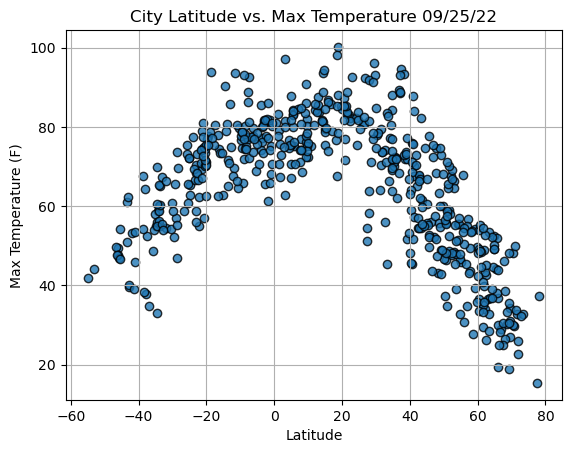

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

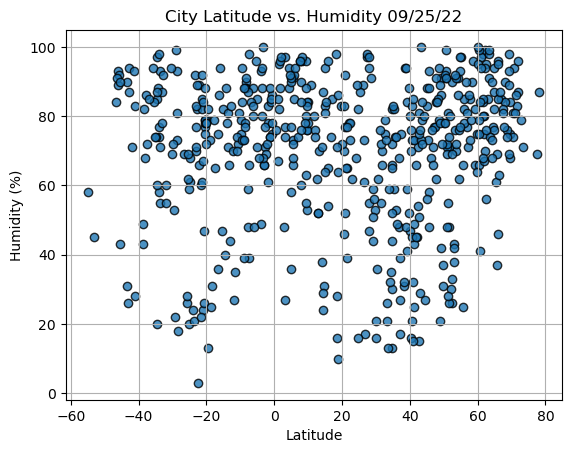

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

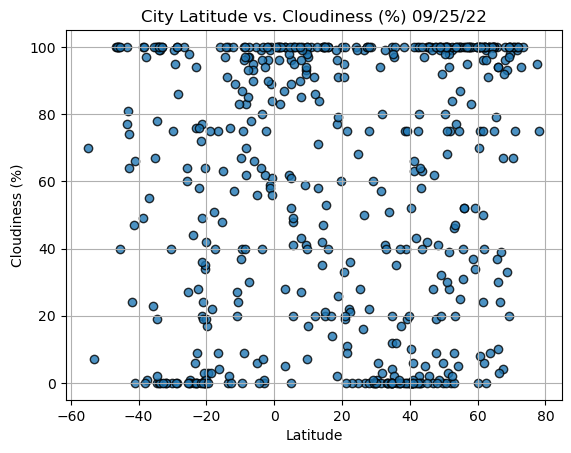

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

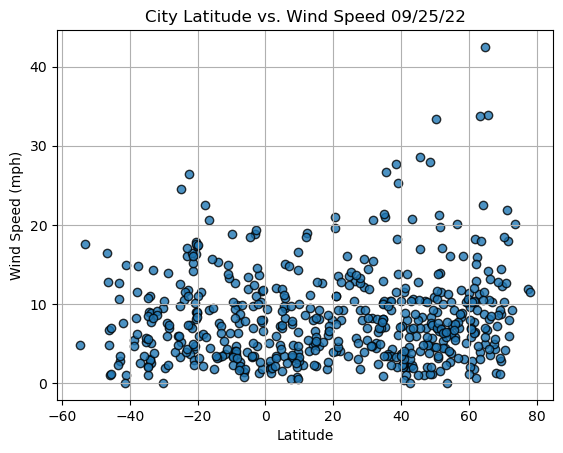

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()